In [1]:
import pandas as pd
import seaborn as sns

In [2]:
column_names = [
  '사용월',
  '호선명',
  '지하철역',
  '04시-05시 승차인원',
  '04시-05시 하차인원',
  '05시-06시 승차인원',
  '05시-06시 하차인원',
  '06시-07시 승차인원',
  '06시-07시 하차인원',
  '07시-08시 승차인원',
  '07시-08시 하차인원',
  '08시-09시 승차인원',
  '08시-09시 하차인원',
  '09시-10시 승차인원',
  '09시-10시 하차인원',
  '10시-11시 승차인원',
  '10시-11시 하차인원',
  '11시-12시 승차인원',
  '11시-12시 하차인원',
  '12시-13시 승차인원',
  '12시-13시 하차인원',
  '13시-14시 승차인원',
  '13시-14시 하차인원',
  '14시-15시 승차인원',
  '14시-15시 하차인원',
  '15시-16시 승차인원',
  '15시-16시 하차인원',
  '16시-17시 승차인원',
  '16시-17시 하차인원',
  '17시-18시 승차인원',
  '17시-18시 하차인원',
  '18시-19시 승차인원',
  '18시-19시 하차인원',
  '19시-20시 승차인원',
  '19시-20시 하차인원',
  '20시-21시 승차인원',
  '20시-21시 하차인원',
  '21시-22시 승차인원',
  '21시-22시 하차인원',
  '22시-23시 승차인원',
  '22시-23시 하차인원',
  '23시-24시 승차인원',
  '23시-24시 하차인원',
  '00시-01시 승차인원',
  '00시-01시 하차인원',
  '01시-02시 승차인원',
  '01시-02시 하차인원',
  '02시-03시 승차인원',
  '02시-03시 하차인원',
  '03시-04시 승차인원',
  '03시-04시 하차인원',
]
dataset_path = './dataset/subway.csv'

In [3]:
raw_dataset = pd.read_csv(dataset_path, na_values='?', comment='\t', sep=',', skipinitialspace=True, encoding='cp949')

In [4]:
dataset = raw_dataset.copy()
dataset.tail()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
44117,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
44118,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
44119,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
44120,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223
44121,201501,중앙선,회기,436,3,10929,3067,23317,10430,65043,...,35702,767,9314,0,0,0,0,0,0,20151223


In [5]:
dataset.isna().sum()

사용월             0
호선명             0
지하철역            0
04시-05시 승차인원    0
04시-05시 하차인원    0
05시-06시 승차인원    0
05시-06시 하차인원    0
06시-07시 승차인원    0
06시-07시 하차인원    0
07시-08시 승차인원    0
07시-08시 하차인원    0
08시-09시 승차인원    0
08시-09시 하차인원    0
09시-10시 승차인원    0
09시-10시 하차인원    0
10시-11시 승차인원    0
10시-11시 하차인원    0
11시-12시 승차인원    0
11시-12시 하차인원    0
12시-13시 승차인원    0
12시-13시 하차인원    0
13시-14시 승차인원    0
13시-14시 하차인원    0
14시-15시 승차인원    0
14시-15시 하차인원    0
15시-16시 승차인원    0
15시-16시 하차인원    0
16시-17시 승차인원    0
16시-17시 하차인원    0
17시-18시 승차인원    0
17시-18시 하차인원    0
18시-19시 승차인원    0
18시-19시 하차인원    0
19시-20시 승차인원    0
19시-20시 하차인원    0
20시-21시 승차인원    0
20시-21시 하차인원    0
21시-22시 승차인원    0
21시-22시 하차인원    0
22시-23시 승차인원    0
22시-23시 하차인원    0
23시-24시 승차인원    0
23시-24시 하차인원    0
00시-01시 승차인원    0
00시-01시 하차인원    0
01시-02시 승차인원    0
01시-02시 하차인원    0
02시-03시 승차인원    0
02시-03시 하차인원    0
03시-04시 승차인원    0
03시-04시 하차인원    0
작업일자            0
dtype: int64

In [6]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [15]:
sns.set(
    font='Malgun Gothic',
    rc={ 'axes.unicode_minus': False },
    style='darkgrid'
)

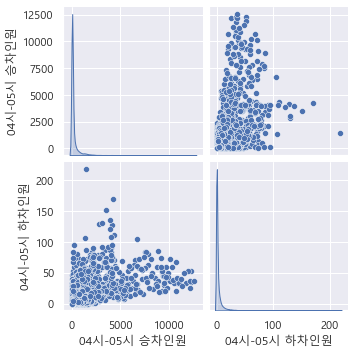

In [16]:
sns.pairplot(
    train_dataset[[
        '04시-05시 승차인원',
        '04시-05시 하차인원',
    ]],
    diag_kind='kde'
)

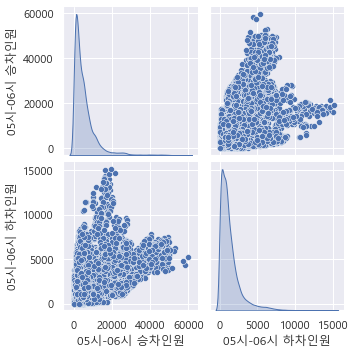

In [17]:
sns.pairplot(
    train_dataset[[
        '05시-06시 승차인원',
        '05시-06시 하차인원',
    ]],
    diag_kind='kde'
)

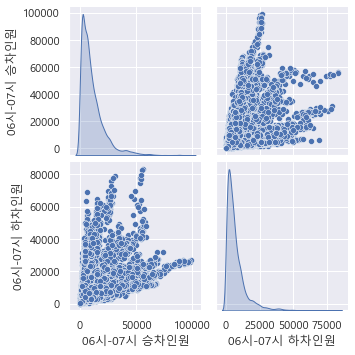

In [18]:
sns.pairplot(
    train_dataset[[
        '06시-07시 승차인원',
        '06시-07시 하차인원',
    ]],
    diag_kind='kde'
)